## Implémentation de la partie 2 du projet

Le code qui suit résoudra le problème de partage équitable donné dans l'article.
A noter que pour son exécution, il suffit simplement que l'utilisateur choisisse le vecteur poids associé souhaité.
Ainsi, l'utilisateur doit entrer 1 pour le vecteur w=(3,2,1) et 2 pour le second vecteur à savoir w=(10,3,1)

In [1]:
import gurobipy as gp
import numpy as np
from gurobipy import *
 
#Commençons par déclarer nos données 
u = [[325,225,210,115,75,50],[325,225,210,115,75,50],[325,225,210,115,75,50]] #L'utilité des agents est la même pour tout le monde
#En effet ce sont des valeurs objectives et ne dépendent pas des individus i 
cas = int(input("Choisir 1 pour le premier vecteur poids et 2 pour l'autre : "))
if cas == 1 : 
    W = [1,1,1]
else :
    W = [7,2,1]
    

n = 3 #Le nombre d'agents 
p = 6 #Le nombre d'objets disponibles 

model = gp.Model('Partie 2 - Projet MOGPL')

#Déclaration de nos variables de décision 
x = np.array([[model.addVar(vtype = GRB.BINARY, name="x%d_%d" %(i+1,j+1))for j in range(p) ]for i in range(n)])

z = np.array([model.addVar(vtype = GRB.CONTINUOUS, lb = 0, name="z%d" %(i+1)) for i in range(n)])

r = np.array([model.addVar(vtype = GRB.CONTINUOUS, lb = - GRB.INFINITY, name = 'r%d' %(k+1)) for k in range(n)])

b = np.array([[model.addVar(vtype = GRB.CONTINUOUS, lb = 0, name="b%d_%d" % (i+1,k+1)) for k in range(n)] for i in range(n)
])

# maj du modele pour integrer les nouvelles variables
model.update()

#Déclarations des contraintes :
for i in range(n):
    model.addConstr( z[i] == quicksum(u[i][j]* x[i][j] for j in range(p)))

for k in range(n):
    for i in range(n):    
        model.addConstr( r[k] - b[i][k] <= z[i])

for j in range(p):
    model.addConstr( quicksum(x[i][j] for i in range(n)) <= 1) 


 # definition de l'objectif
fonction_obj = LinExpr();
fonction_obj =0
for k in range(n):
    fonction_obj += W[k]*((k+1)*r[k] - quicksum(b[i][k] for i in range(n)) )

model.setObjective(fonction_obj,GRB.MAXIMIZE)

    # Resolution
model.optimize()


xfinal=np.array( [[ x[i][j].x  for j in range(p)]for i in range(n)]  )
zfinal=np.array([ z[i].x for i in range(n) ])
    

print("Le poids sélectionné est : ",W)
print('La solution optimale du problème est : ',xfinal)
print('La valeur optimale du problème est (la satisfaction max des trois agents respectivement): ', zfinal)



Choisir 1 pour le premier vecteur poids et 2 pour l'autre : 1
Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-17
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[rosetta2])

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 18 rows, 33 columns and 66 nonzeros
Model fingerprint: 0x98b01b00
Variable types: 15 continuous, 18 integer (18 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+02]
  Objective range  [1e+00, 3e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective -0.0000000
Presolve removed 0 rows and 3 columns
Presolve time: 0.00s
Presolved: 18 rows, 30 columns, 63 nonzeros
Variable types: 8 continuous, 22 integer (18 binary)

Root relaxation: objective 2.000000e+03, 17 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl | 

### Maximisation de la satisfaction moyenne des individus

Dans cette partie, nous n'aurons pas besoin de vecteur poids étant donné que nous maximisons la satisfaction moyenne des individus.
Les contraintes et variables resteront en revanche inchangées.

In [2]:
import gurobipy as gp
import numpy as np
from gurobipy import *
 
#Commençons par déclarer nos données 
u = [[325,225,210,115,75,50],[325,225,210,115,75,50],[325,225,210,115,75,50]] #L'utilité des agents est la même pour tout le monde
#En effet ce sont des valeurs objectives et ne dépendent pas des individus i 

n = 3 #Le nombre d'agents 
p = 6 #Le nombre d'objets disponibles 

model = gp.Model('Partie 2 - Projet MOGPL')

#Déclaration de nos variables de décision 
x = np.array([[model.addVar(vtype = GRB.BINARY, name="x%d_%d" %(i+1,j+1))for j in range(p) ]for i in range(n)])

z = np.array([model.addVar(vtype = GRB.CONTINUOUS, lb = 0, name="z%d" %(i+1)) for i in range(n)])

r = np.array([model.addVar(vtype = GRB.CONTINUOUS, lb = - GRB.INFINITY, name = 'r%d' %(k+1)) for k in range(n)])

b = np.array([[model.addVar(vtype = GRB.CONTINUOUS, lb = 0, name="b%d_%d" % (i+1,k+1)) for k in range(n)] for i in range(n)
])

# maj du modele pour integrer les nouvelles variables
model.update()

#Déclarations des contraintes :
for i in range(n):
    model.addConstr( z[i] == quicksum(u[i][j]* x[i][j] for j in range(p)))

for k in range(n):
    for i in range(n):    
        model.addConstr( r[k] - b[i][k] <= z[i])

for j in range(p):
    model.addConstr( quicksum(x[i][j] for i in range(n)) <= 1) 


 # definition de l'objectif
fonction_obj = LinExpr();
fonction_obj =np.mean(z)

model.setObjective(fonction_obj,GRB.MAXIMIZE)

    # Resolution
model.optimize()


xfinal=np.array( [[ x[i][j].x  for j in range(p)]for i in range(n)]  )
zfinal=np.array([ z[i].x for i in range(n) ])
    

print('La solution optimale du problème est : ',xfinal)
print('La valeur optimale du problème est (la satisfaction max des trois agents respectivement): ', zfinal)



Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[rosetta2])

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 18 rows, 33 columns and 66 nonzeros
Model fingerprint: 0x10f43d9a
Variable types: 15 continuous, 18 integer (18 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+02]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective -0.0000000
Presolve removed 18 rows and 33 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 2: 333.333 -0 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.333333333333e+02, best bound 3.333333333333e+02, gap 0.0000%
La solution optimale du problème est :  [[0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1.]]
La val

### Si on considère la contrainte des 10% versés à l'état

In [3]:
import gurobipy as gp
import numpy as np
from gurobipy import *
u = [[325,225,210,115,75,50],[325,225,210,115,75,50],[325,225,210,115,75,50]] #L'utilité des agents est la même pour tout le monde
#En effet ce sont des valeurs objectives et ne dépendent pas des individus i 
cas = int(input("Choisir 1 pour le premier vecteur poids et 2 pour l'autre : "))
if cas == 1 : 
    W = [1,1,1]
else :
    W = [7,2,1]
    

n = 3 #Le nombre d'agents 
p = 6 #Le nombre d'objets disponibles 

model = gp.Model('Partie 2 - Projet MOGPL')

#Déclaration de nos variables de décision 
x = np.array(
    [[model.addVar(vtype = GRB.BINARY, name="x%d_%d" %(i+1,j+1))for j in range(p) ]for i in range(n)])

z = np.array(
    [model.addVar(vtype = GRB.CONTINUOUS, lb = 0, name="z%d" %(i+1)) for i in range(n)])

r = np.array(
    [model.addVar(vtype = GRB.CONTINUOUS, lb = - GRB.INFINITY, name = 'r%d' %(k+1)) for k in range(n)])

b = np.array([
    [model.addVar(vtype = GRB.CONTINUOUS, lb = 0, name="b%d_%d" % (i+1,k+1)) for k in range(n)] for i in range(n)
])

#Déclarations des contraintes :
for i in range(n):
        model.addConstr( z[i] == quicksum(u[i][j]* x[i][j] for j in range(p)))

for k in range(n):
        for i in range(n):    
            model.addConstr( r[k] - b[i][k] <= z[i])

for j in range(p):
    model.addConstr( quicksum(x[i][j] for i in range(n)) <= 1)

model.addConstr(quicksum(z[i] for i in range(n)) <= 900) #L'utilité ne doit pas dépasser la valeur des objets au total à savoir 1000 euros

# maj du modele pour integrer les nouvelles variables
model.update()

    # definition de l'objectif
fonction_obj = LinExpr();
#fonction_obj = np.mean(z)
for k in range(n):
        fonction_obj += W[k]*( (k+1)*r[k] - quicksum(b[i][k] for i in range(n)) )


model.setObjective(fonction_obj,GRB.MAXIMIZE)

    # Resolution
model.optimize()


xfinal=np.array( [[ x[i][j].x  for j in range(p)]for i in range(n)]  )
zfinal=np.array([ z[i].x for i in range(n) ])
    

print("Le poids sélectionné est : ",W)
print('La solution optimale du problème est (Les objets à prendre sont :)',xfinal)
print('La valeur optimale du problème est (la satisfaction max des deux agents respectivement): ', zfinal)

Choisir 1 pour le premier vecteur poids et 2 pour l'autre : 1
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[rosetta2])

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 19 rows, 33 columns and 69 nonzeros
Model fingerprint: 0xe49f7737
Variable types: 15 continuous, 18 integer (18 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+02]
  Objective range  [1e+00, 3e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+02]
Found heuristic solution: objective -0.0000000
Presolve removed 0 rows and 3 columns
Presolve time: 0.00s
Presolved: 19 rows, 30 columns, 66 nonzeros
Variable types: 8 continuous, 22 integer (18 binary)

Root relaxation: objective 1.800000e+03, 19 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 1800.00000    0

### Génération des vecteurs/Matrices demandées

Nous allons dans un premier temps définir la fonction résolution afin d'éviter la redondance du code et de faciliter la lisibilité de ce dernier (nous avons simplement réécrit la modélisation/résolution établie plus haut, dans tout ce qui suit nous n'allons pas considérer la contrainte de l'état

In [14]:
import time 

def resolution(u,W,n,b):
    
    p = 5*n #Donné dans l'énoncé de l'exercice 
    model = gp.Model('Partie 2 - Projet MOGPL')
    
    #Déclaration de nos variables de décision 
    
    x = np.array([[model.addVar(vtype = GRB.BINARY, name="x%d_%d" %(i+1,j+1))for j in range(p) ]for i in range(n)])

    z = np.array([model.addVar(vtype = GRB.CONTINUOUS, lb = 0, name="z%d" %(i+1)) for i in range(n)])
    
    r = np.array([model.addVar(vtype = GRB.CONTINUOUS, lb = - GRB.INFINITY, name = 'r%d' %(k+1)) for k in range(n)])

    b = np.array([[model.addVar(vtype = GRB.CONTINUOUS, lb = 0, name="b%d_%d" % (i+1,k+1)) for k in range(n)] for i in range(n)])
    
    # maj du modele pour integrer les nouvelles variables
    
    model.update()
    
    #Déclarations des contraintes :
    for i in range(n):
        model.addConstr( z[i] == quicksum(u[i][j]* x[i][j] for j in range(p)))
        
    for k in range(n):
        for i in range(n):    
            model.addConstr( r[k] - b[i][k] <= z[i])
    
    for j in range(p):
        model.addConstr( quicksum(x[i][j] for i in range(n)) <= 1) 
    
    # definition de l'objectif
    
    fonction_obj = LinExpr();
    fonction_obj =0
    for k in range(n):
        fonction_obj += W[k]*((k+1)*r[k] - quicksum(b[i][k] for i in range(n)) )
    
    # Resolution
    # Étant donné le volume des données traitées, nous définissons une limitation de temps
    model.setObjective(fonction_obj,GRB.MAXIMIZE)
    model.setParam('MIPGap', 0.01)
    model.setParam('Timelimit', 60)#Limite de temps d'une minute 
    t1= time.time()
    model.optimize()
    t2 = time.time()

    xfinal=np.array( [[ x[i][j].x  for j in range(p)]for i in range(n)]  )
    zfinal=np.array([ z[i].x for i in range(n) ])
    
    t2 = time.time()
    
    return xfinal,zfinal, t2-t1

Passons à présent à la génération des matrices et vecteurs demandés aléatoirement

In [27]:
n = 20
p = 5*n
U=[]
P=[]
for i in range(10):
    U.append(np.random.randint(500,high=None,size=(n,p)))
    W=[np.random.randint(20)]
    for j in range(1,p):
        w = np.random.randint(20)
        while(w > W[j-1]):
            w = np.random.randint(20)
        W.append(w)
        #Calcul des w'k : 
        wbis = []
        for i in range(len(W)-1):
            wbis.append (W[i]-W[i+1])
        wbis.append(W[len(W)-1])
    P.append(wbis)

    T = []#J'en aurai besoin pour calculer le temps 

for i in range(10):
    (x,z,t)= resolution(U[i],P[i],n,0)
    T.append(t)
    
print("Le temps moyen est : ",np.mean(T))
print("Le vecteur temps des 10 instances",T)

Set parameter MIPGap to value 0.01
Set parameter TimeLimit to value 60
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[rosetta2])

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 520 rows, 2440 columns and 5217 nonzeros
Model fingerprint: 0xbfaae47c
Variable types: 440 continuous, 2000 integer (2000 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+02]
  Objective range  [4e+00, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective -0.0000000
Presolve removed 360 rows and 381 columns
Presolve time: 0.01s
Presolved: 160 rows, 2059 columns, 4134 nonzeros
Variable types: 42 continuous, 2017 integer (1997 binary)

Root relaxation: objective 4.254252e+04, 442 iterations, 0.01 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node 


     0     0 18881.8075    0   57   -0.00000 18881.8075      -     -    0s
H    0     0                    18240.000000 18881.8075  3.52%     -    0s
H    0     0                    18241.000000 18881.8075  3.51%     -    0s
     0     0 18881.7814    0   57 18241.0000 18881.7814  3.51%     -    0s
H    0     0                    18248.000000 18881.7814  3.47%     -    0s
     0     2 18881.7814    0   57 18248.0000 18881.7814  3.47%     -    0s
H   33    40                    18250.000000 18880.6824  3.46%   6.7    0s
H   37    40                    18254.000000 18880.6824  3.43%   6.5    0s
H   68    80                    18265.000000 18880.4323  3.37%   6.3    0s
H  128   132                    18286.000000 18880.4323  3.25%   6.4    0s
H 3201  2892                    18348.000000 18789.5087  2.41%   4.9    3s
H 6976  5116                    18358.000000 18789.5087  2.35%   6.2    4s
H 6977  4949                    18385.000000 18789.5087  2.20%   6.2    4s
  8529  6048 18553.1311 

 27188 22167 20802.4529   91   60 20570.0000 20998.9921  2.09%   8.1   10s
 29933 23387 20755.0802  156  160 20570.0000 20960.9045  1.90%   7.9   15s
H29958 22233                    20608.000000 20942.7428  1.62%   7.9   17s
H29964 21124                    20622.000000 20941.0752  1.55%   7.9   18s
H29970 20070                    20658.000000 20940.9379  1.37%   7.9   18s
 29979 20079 20940.1227   31  171 20658.0000 20940.7933  1.37%   8.0   21s
 30463 20458 20879.1219   57  119 20658.0000 20931.0105  1.32%   8.8   25s
H32661 20614                    20661.000000 20931.0105  1.31%  10.2   28s
 35015 21876 20756.2004  187   87 20661.0000 20931.0105  1.31%  10.9   30s
 44283 27291 20816.7345  128   87 20661.0000 20915.6628  1.23%  12.7   35s
 57321 34368 20844.1230   80   88 20661.0000 20909.5517  1.20%  13.0   40s
 70554 41750 20866.1169   46  123 20661.0000 20903.9319  1.18%  13.3   45s
 83714 49033 20852.4564   52  124 20661.0000 20900.6742  1.16%  13.8   50s
 96871 59458 20812.6835  

Set parameter TimeLimit to value 60
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[rosetta2])

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 520 rows, 2440 columns and 5212 nonzeros
Model fingerprint: 0x063293b0
Variable types: 440 continuous, 2000 integer (2000 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+02]
  Objective range  [1e+00, 3e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective -0.0000000
Presolve removed 360 rows and 386 columns
Presolve time: 0.01s
Presolved: 160 rows, 2054 columns, 4124 nonzeros
Variable types: 42 continuous, 2012 integer (1992 binary)

Root relaxation: objective 7.526000e+04, 408 iterations, 0.01 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 75259.9996    0 

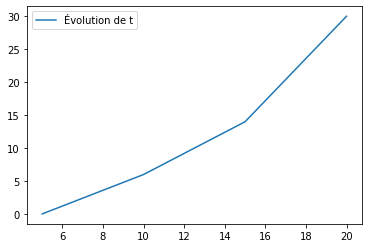

In [28]:
import matplotlib.pyplot as plt

n = np.array([5,10,15,20])
y = np.array([0.02,6,14,30]) #Les temps moyens obtenus pour chaque couple
plt.plot(n, y, label="Évolution de t")
plt.legend()
plt.savefig('Trace du tempspar rapport a n.png', dpi=300, bbox_inches='tight')
plt.show()